# Task 6.4 Machine Learning: Regression Analysis

## Script Contents

### 1. Import libraries and data sets  
### 2. Clean data sets for analysis  
### 3. Explore data using scatterplot
### 4. Hypothesis statement
### 5. Prepare variables for use in a regression
### 6. Split the data into training and test sets
### 7. Run a linear regression
#### 7.1 Fit the model to the training set and create a test set prediction for y  
#### 7.2 Plot regression line  
#### 7.3 Interpretation of test accuracy. 
#### 7.4 Check model performance statistics  
#### 7.5 Compare predicted and actual values for y  
#### 7.6 Reflection on performance

# 1. Import libraries and data sets

## 1.1 Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Ensure created graphs are displayed within the notebook without the need to "call" them specifically.
%matplotlib inline

## 1.2 Import data sets

In [3]:
path = r'/Users/brucehickling/Library/CloudStorage/Dropbox/Courses/CareerFoundry/Data Immersion/6_Advanced Analytics & Dashboard Design/Achievement Project/'

In [4]:
# Import data set to use in the regression analysis
df = pd.read_csv(os.path.join(path, '2_Data', 'Prepared Data', 'HUD_gun_analysis.csv'))

In [5]:
# Check the dataframe
df.head()

,FIPS Code,assisted_housing_count,active_finance,gun incident count,% of adults ≤ high school dip,avg unemploy rate 2015_2020,Area housing assistance category,Gun incident category
0,1001,1,0,40,11.5,4.250000,Few properties,Few gun incidents
1,1003,12,7,86,9.2,4.533333,Few properties,Few gun incidents
2,1005,3,1,21,26.8,6.533333,Few properties,Few gun incidents
3,1007,1,1,8,20.9,5.233333,Few properties,Few gun incidents
4,1009,2,0,21,19.5,4.216667,Few properties,Few gun incidents


In [6]:
df.shape

(2344, 8)

In [7]:
df.columns

Index(['FIPS Code', 'assisted_housing_count', 'active_finance',
       'gun incident count', '% of adults ≤ high school dip',
       'avg unemploy rate 2015_2020', 'Area housing assistance category',
       'Gun incident category'],
      dtype='object')

# 2. Clean data sets for analysis

In [8]:
df.describe()

,FIPS Code,assisted_housing_count,active_finance,gun incident count,% of adults ≤ high school dip,avg unemploy rate 2015_2020
count,2344.000000,2344.000000,2344.000000,2344.000000,2344.000000,2344.000000
mean,30215.667235,9.856655,5.348549,95.995307,12.874787,5.161519
std,15158.765859,24.371028,13.823135,361.071065,5.742854,1.581753
min,1001.000000,1.000000,0.000000,1.000000,1.400000,1.916667
25%,18160.000000,2.000000,1.000000,5.000000,8.600000,4.116667
50%,29106.000000,4.000000,2.000000,13.000000,11.700000,4.933333
75%,42115.500000,9.000000,5.000000,51.000000,16.200000,5.950000
max,56043.000000,628.000000,288.000000,11780.000000,43.100000,21.783333


In [9]:
# Rename three columns for consistency
df.rename(columns = {'FIPS Code' : 'FIPS_code', 'gun incident count' : 'gun_incident_count', '% of adults ≤ high school dip' : '%adults<high_school_dip', 'avg unemploy rate 2015_2020' : 'avg_unemploy_rate_2015-2020', 'Area housing assistance category' : 'assisted_housing_density', 'Gun incident category': 'gun_incidence_category'}, inplace = True)

In [10]:
# Check for missing data
df.isnull().sum()

FIPS_code                      0
assisted_housing_count         0
active_finance                 0
gun_incident_count             0
%adults<high_school_dip        0
avg_unemploy_rate_2015-2020    0
assisted_housing_density       0
gun_incidence_category         0
dtype: int64

In [11]:
# Check for duplidates
df_dups = df[df.duplicated()]

In [12]:
df_dups

,FIPS_code,assisted_housing_count,active_finance,gun_incident_count,%adults<high_school_dip,avg_unemploy_rate_2015-2020,assisted_housing_density,gun_incidence_category


## 2.1 Check assisted housing count for extreme values

<Axes: xlabel='assisted_housing_count', ylabel='Count'>

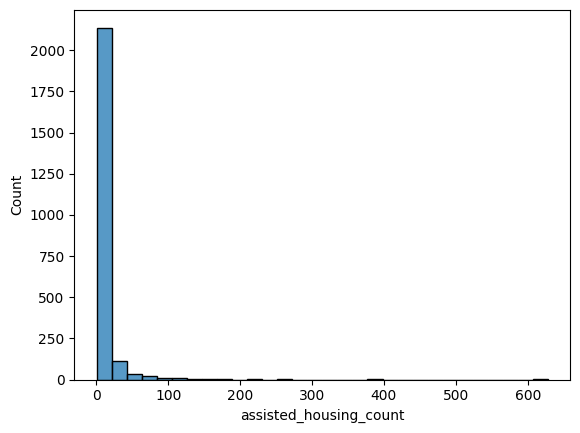

In [13]:
# Check assisted housing count values
sns.histplot(df['assisted_housing_count'], bins=30)

In [14]:
# Check other statistics for assisted housing count
df['assisted_housing_count'].mean()

9.856655290102388

In [15]:
df['assisted_housing_count'].median()

4.0

In [16]:
df['assisted_housing_count'].max()

628

In [17]:
df['assisted_housing_count'].min()

1

__There are obvious extreme values in the 'assisted housing count' but it is not yet conclusive if they are ligitimate outliers. It is my assumption that the extreme values for this variable come from the largest urban cities in the U.S. and so would be important to include in an analysis of multifamily assisted housing.  That said, it might be useful as a next step of analysis, beyond this task, to look at categorizing for population by county to categorize and analyse different population density categories. For this particular regression analysis exercise, I will treat the extreme values as outliers and remove them.__  

__For 'assisted housing count' I will treat a count > 50 as an outlier.__

In [18]:
# Remove extreme values from the 'assisted housing count' variable
df = df[df['assisted_housing_count'] < 50]

In [19]:
df.head()

,FIPS_code,assisted_housing_count,active_finance,gun_incident_count,%adults<high_school_dip,avg_unemploy_rate_2015-2020,assisted_housing_density,gun_incidence_category
0,1001,1,0,40,11.5,4.250000,Few properties,Few gun incidents
1,1003,12,7,86,9.2,4.533333,Few properties,Few gun incidents
2,1005,3,1,21,26.8,6.533333,Few properties,Few gun incidents
3,1007,1,1,8,20.9,5.233333,Few properties,Few gun incidents
4,1009,2,0,21,19.5,4.216667,Few properties,Few gun incidents


In [20]:
df['assisted_housing_count'].max()

49

## 2.2 Check gun incident count for extreme values

<Axes: xlabel='gun_incident_count', ylabel='Count'>

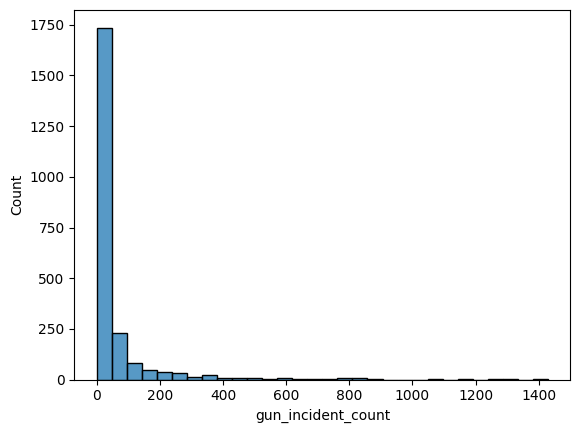

In [21]:
# Check gun incident count values
sns.histplot(df['gun_incident_count'], bins=30)

In [22]:
# Check other statistics for assisted housing count
df['gun_incident_count'].mean()

57.068402471315096

In [23]:
df['gun_incident_count'].median()

12.0

In [24]:
df['gun_incident_count'].max()

1429

In [25]:
df['gun_incident_count'].min()

1

__There are obvious extreme values in the 'gun incident count' but it is unfortunately the case that they are not ligitimate outliers, but counties in the U.S with very high rates of gun violence and other violent crime. It is my assumption that the extreme values for this variable come from large urban areas in the U.S. and so would be important to include in an analysis of multifamily assisted housing and gun violence.  That said, it might be useful as a next step of analysis, beyond this task, to look at categorizing for population by county to categorize and analyse different population density categories along with multifamily assisted housing properaties. For this particular regression analysis exercise, I will treat the extreme values as outliers and remove them.__  

__For 'assisted housing count' I will treat a count > 300 as an outlier.__

In [26]:
# Remove extreme values from the 'gun incident count' variable
df = df[df['gun_incident_count'] < 300]

In [27]:
df['gun_incident_count'].max()

299

# 3. Explore data using scatterplot

<function matplotlib.pyplot.show(close=None, block=None)>

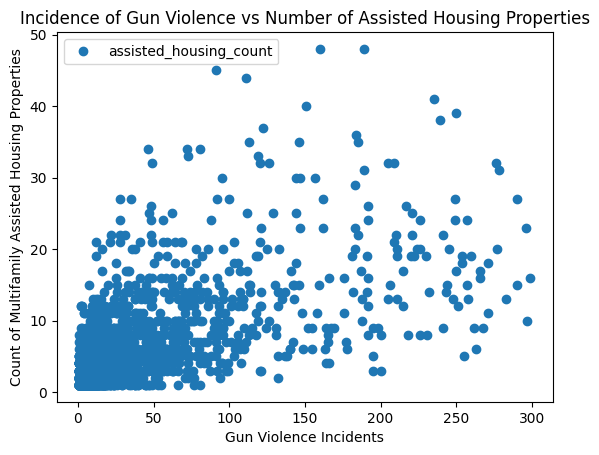

In [28]:
# Create a scatterplot of gun violence vs assisted housing
df.plot(x = 'gun_incident_count', y = 'assisted_housing_count', style = 'o')
plt.title('Incidence of Gun Violence vs Number of Assisted Housing Properties')
plt.xlabel('Gun Violence Incidents')
plt.ylabel('Count of Multifamily Assisted Housing Properties')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

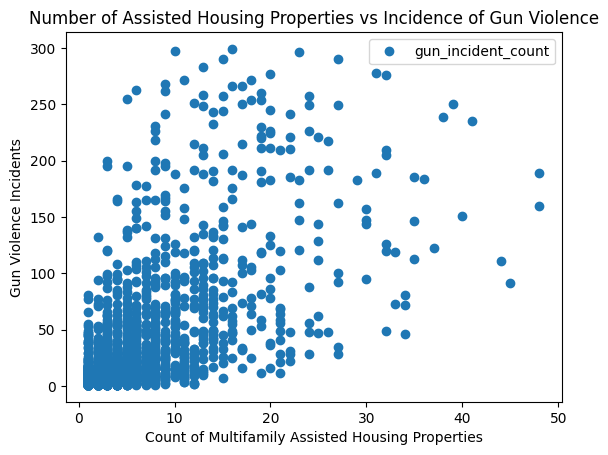

In [29]:
# Create a scatterplot of assisted housing vs gun violence
df.plot(x = 'assisted_housing_count', y = 'gun_incident_count', style = 'o')
plt.title('Number of Assisted Housing Properties vs Incidence of Gun Violence')
plt.xlabel('Count of Multifamily Assisted Housing Properties')
plt.ylabel('Gun Violence Incidents')
plt.show

# 4. Hypothesis statement

__My intial hypothesis is: "Counties in the United States with more multifamilty assisted housing properties will suffer from higher rates of gun violence than counties with fewer multifamily assisted housing properties."__  

__I would have thought that gun violence was the independent variable, but from looking at the scatterplots above (and the categorical plots created in Task 6.2) I hypothesize that there is a stronger correlation with gun violence as teh dependent variable, which I would like to test here.__

# 5. Perform a regression analysis of assisted housing and gun violence

## 5.1 Prepare variables for use in a regression

In [30]:
# Reshape the variables into Numpy arrays and put them into separate objects
X = df['gun_incident_count'].values.reshape(-1,1)
y = df['assisted_housing_count'].values.reshape(-1,1)

In [31]:
X

array([[40],
       [86],
       [21],
       ...,
       [ 3],
       [ 3],
       [ 3]])

In [32]:
y

array([[ 1],
       [12],
       [ 3],
       ...,
       [ 3],
       [ 2],
       [ 2]])

## 5.2 Split the data into training and test sets

In [33]:
# Split the data into a training set and a test set
X_train,  X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=0)

## 5.3 Create the linear regression model

In [34]:
# Create a regression object
regression = LinearRegression()

## 5.4 Fit the model to the training set and create a test set prediction for y

In [35]:
regression.fit(X_train, y_train)

LinearRegression()

In [36]:
# Predict the values of y using X
y_predicted = regression.predict(X_test)

## 5.5 Plot regression line

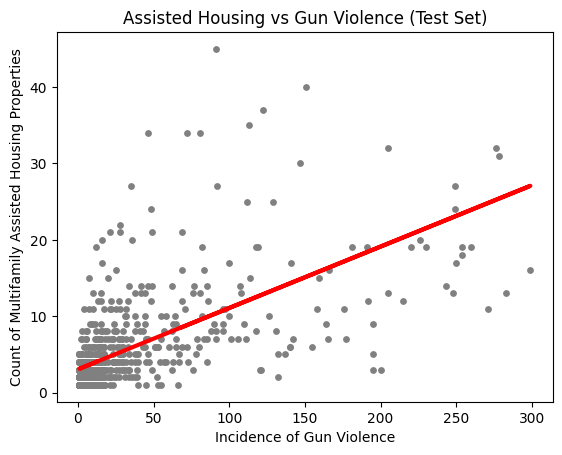

In [47]:
plot_test = plt
plot_test.scatter(X_test, y_test, color='grey', s = 15)
plot_test.plot(X_test, y_predicted, color='red',  linewidth = 3)
plot_test.title('Assisted Housing vs Gun Violence (Test Set)')
plot_test.xlabel('Incidence of Gun Violence')
plot_test.ylabel('Count of Multifamily Assisted Housing Properties')
plot_test.show()

In [48]:
# Export plot
plot_test.savefig('linear_regession.png')

<Figure size 640x480 with 0 Axes>

## 5.6 Interpretation of test accuracy

__There are a handful of counties with a high concentration of multifamily assisted housing properties without the same levels of gun violence reported as in many other areas with few numbers of assisted housing properties. It could be with a lower threshold for extreme values on the count of assisted housing properties the model would be more accurate, but as mentioned earlier this might be introducing some bias or otherwise influencing the outcome of the regression as it has not been determined that the extreme values are legitimate outliers.__  

__Overall, I would interpret the model as generally true as a correlationt but that it is not very accurate as there are additional variables to consider that would provide a more accurate model__.

## 5.7 Check model performance statistics

In [39]:
# Create objects that contain summary statistics of the model's performance for the mean squared error and R2 score
rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

In [40]:
# Print the model summary statistics to evaluate the model
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.08037276]]
Mean squared error:  24.8343847632361
R2 score:  0.3586025388228802


## 5.8 Compare predicted and actual values for y

In [41]:
y_predicted

array([[ 4.00427841],
       [ 3.28092353],
       [ 7.6210528 ],
       [ 4.16502394],
       [ 3.28092353],
       [ 3.68278735],
       [12.20230037],
       [ 3.52204182],
       [ 3.52204182],
       [ 4.16502394],
       [ 3.20055077],
       [ 3.76316012],
       [ 4.2453967 ],
       [ 6.57620687],
       [ 6.97807069],
       [21.20404997],
       [ 3.84353288],
       [ 3.20055077],
       [10.43409955],
       [14.372365  ],
       [ 3.3612963 ],
       [ 3.60241459],
       [ 3.44166906],
       [ 5.3706154 ],
       [ 3.60241459],
       [ 3.28092353],
       [ 4.80800605],
       [ 3.68278735],
       [ 3.120178  ],
       [ 4.32576947],
       [ 3.20055077],
       [ 3.84353288],
       [ 3.92390565],
       [ 4.08465117],
       [ 4.40614223],
       [14.29199224],
       [ 3.20055077],
       [ 3.120178  ],
       [17.18541175],
       [ 4.96875158],
       [13.56863736],
       [ 3.76316012],
       [ 3.3612963 ],
       [ 3.3612963 ],
       [ 8.02291662],
       [ 3

In [42]:
# Create a dataframe comparing the actual and predicted values of y
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,5,4.004278
1,3,3.280924
2,8,7.621053
3,2,4.165024
4,1,3.280924
5,1,3.682787
6,15,12.202300
7,3,3.522042
8,3,3.522042
9,5,4.165024


In [43]:
# Check how well the model fits the training set
y_predicted_train = regression.predict(X_train)

In [44]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [45]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.08037276]]
Mean squared error:  20.835860736261015
R2 score:  0.44627537740106293


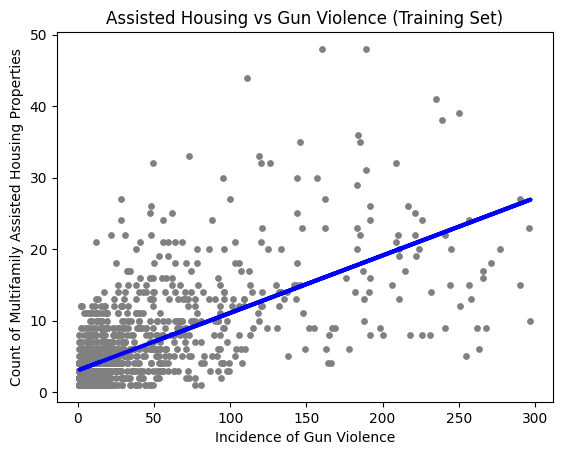

In [46]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='grey', s = 15)
plot_test.plot(X_train, y_predicted_train, color='blue', linewidth =3)
plot_test.title('Assisted Housing vs Gun Violence (Training Set)')
plot_test.xlabel('Incidence of Gun Violence')
plot_test.ylabel('Count of Multifamily Assisted Housing Properties')
plot_test.show()

## 5.9 Reflection on performance

__While there is a definite strong positive correlation between the number of multifamily assisted housing properties and the incidents of gun violence at the county-level in the U.S. a linear regression is not the right method for predicting the influence of this relationship.  There are clearly other factors to consider, and I believe that a multiple regression model is likely necessary to more accurately predict the function of the relationship between the variables of the count of multifamily assisted housing properties and the incidence of gun violence in the U.S.__